# SAS. Homework 4

In [148]:
# Part 0: load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%config InlineBackend.figure_formats = ['svg']

In [149]:
# Part 1: load the data
data = pd.read_csv("HW1_var_6.csv", sep=';')
data

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,6,1000006,Поступление зарплаты на счет,Ремонт,1.0,0.11,женский,1,0,высшее,...,0.0,28.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1000026,Поступление зарплаты на счет,Отпуск,0.0,0.33,женский,0,0,высшее,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1000046,2НДФЛ,Ремонт,0.0,0.48,женский,0,0,Высшее/Второе высшее/Ученая степень,...,0.0,6.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,1000066,Форма банка (без печати работодателя),Покупка недвижимости/ строительство,0.0,0.4,мужской,0,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1000086,2НДФЛ,Покупка недвижимости/ строительство,1.0,0.36,мужской,1,0,среднее-специальное,...,4.0,17.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,6,1204766,2НДФЛ,Ремонт,0.0,0.52,мужской,0,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10239,6,1204786,Форма банка (без печати работодателя),Ремонт,1.0,0.16,женский,0,0,среднее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10240,6,1204806,Форма банка (без печати работодателя),Ремонт,0.0,0.56,женский,1,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10241,6,1204826,2НДФЛ,Покупка автомобиля,1.0,0.48,женский,0,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Part 2: load the fancy column labels
cols = pd.read_csv("Описание параметров.csv", sep=';')
cols

,Атрибуты,Описание,Description
0,Номер варианта,Номер варианта,Variant number
1,ID,Идентификатор клиента,Client ID
2,INCOME_BASE_TYPE,Подтверждение дохода,Income verification
3,CREDIT_PURPOSE,Цель получения кредита,Purpose of the loan
4,INSURANCE_FLAG,Страхование заемщика при получении кредита,Borrower's insurance when receiving a loan
5,DTI,debt-to-income ratio — отношение долга к доходам,debt-to-income ratio - the ratio of debt to in...
6,SEX,Пол,Floor
7,FULL_AGE_CHILD_NUMBER,Кол-во лет ребенку,Number of years of the child
8,DEPENDANT_NUMBER,Кол-во иждивенцев,Number of dependents
9,EDUCATION,Образование,Education


## Часть 1: Исследование данных

### Задание 1: Исследуем распределения по данным

#### Пункт 1.1: Рассчитываем кол-во уникальных значений, нулевых и пустых значений + доля в % от общего кол-ва

In [151]:
# создаём пустую таблицу, которую будем заполнять
res1 = pd.DataFrame(columns=[
  'колонка', 'описание',
  'кол-во уникальных', 'доля уникальных',
  'кол-во нулевых', 'доля нулевых',
  'кол-во пустых', 'доля пустых',
])

for i, col in enumerate(data):
  size = data[col].size
  uniq = data[col].unique().size
  zero = sum(data[col] == 0)
  null = sum(data[col].isna())
  res1.loc[i] = [col, cols.loc[i]['Описание'], uniq, uniq/size, zero, zero/size, null, null/size]

res1

,колонка,описание,кол-во уникальных,доля уникальных,кол-во нулевых,доля нулевых,кол-во пустых,доля пустых
0,Номер варианта,Номер варианта,1,0.000098,0,0.000000,0,0.000000
1,ID,Идентификатор клиента,10243,1.000000,0,0.000000,0,0.000000
2,INCOME_BASE_TYPE,Подтверждение дохода,5,0.000488,0,0.000000,86,0.008396
3,CREDIT_PURPOSE,Цель получения кредита,10,0.000976,0,0.000000,0,0.000000
4,INSURANCE_FLAG,Страхование заемщика при получении кредита,3,0.000293,4082,0.398516,1,0.000098
5,DTI,debt-to-income ratio — отношение долга к доходам,60,0.005858,0,0.000000,146,0.014254
6,SEX,Пол,2,0.000195,0,0.000000,0,0.000000
7,FULL_AGE_CHILD_NUMBER,Кол-во лет ребенку,6,0.000586,6068,0.592405,0,0.000000
8,DEPENDANT_NUMBER,Кол-во иждивенцев,5,0.000488,10214,0.997169,0,0.000000
9,EDUCATION,Образование,9,0.000879,0,0.000000,0,0.000000


#### Пункт 1.2: Среднее значение, медиана, стандартное отклонение, минимум, максимум, тип данных по каждому показателю в предоставленных данных

In [152]:
# создаём список категориальных переменных
cols_cat = []

# создаём пустую таблицу, которую будем заполнять
res2 = pd.DataFrame(columns=[
  'колонка', 'описание',
  'среднее', 'медиана', 'стандартное отклонение',
  'минимум', 'максимум',
  'тип данных',
])

for i, col in enumerate(data):
  arr = data[col]
  if arr.dtype == object:
    cols_cat.append(col)
    res2.loc[i] = [
      col, cols.loc[i]['Описание'],
      np.nan, np.nan, np.nan, np.nan, np.nan,
      arr.dtype
    ]
  else:
    res2.loc[i] = [
      col, cols.loc[i]['Описание'],
      arr.mean(), arr.median(), arr.std(),
      arr.min(), arr.max(),
      arr.dtype
    ]

res2

,колонка,описание,среднее,медиана,стандартное отклонение,минимум,максимум,тип данных
0,Номер варианта,Номер варианта,6.000000e+00,6.000000e+00,0.000000,6.0,6.0,int64
1,ID,Идентификатор клиента,1.102426e+06,1.102426e+06,59140.874754,1000006.0,1204846.0,int64
2,INCOME_BASE_TYPE,Подтверждение дохода,NaN,NaN,NaN,NaN,NaN,object
3,CREDIT_PURPOSE,Цель получения кредита,NaN,NaN,NaN,NaN,NaN,object
4,INSURANCE_FLAG,Страхование заемщика при получении кредита,6.014450e-01,1.000000e+00,0.489625,0.0,1.0,float64
5,DTI,debt-to-income ratio — отношение долга к доходам,NaN,NaN,NaN,NaN,NaN,object
6,SEX,Пол,NaN,NaN,NaN,NaN,NaN,object
7,FULL_AGE_CHILD_NUMBER,Кол-во лет ребенку,5.624329e-01,0.000000e+00,0.771415,0.0,5.0,int64
8,DEPENDANT_NUMBER,Кол-во иждивенцев,3.905106e-03,0.000000e+00,0.082579,0.0,4.0,int64
9,EDUCATION,Образование,NaN,NaN,NaN,NaN,NaN,object


#### Пункт 1.3: Исследуем распределение данных по полу, возрасту и другим категориальным показателям

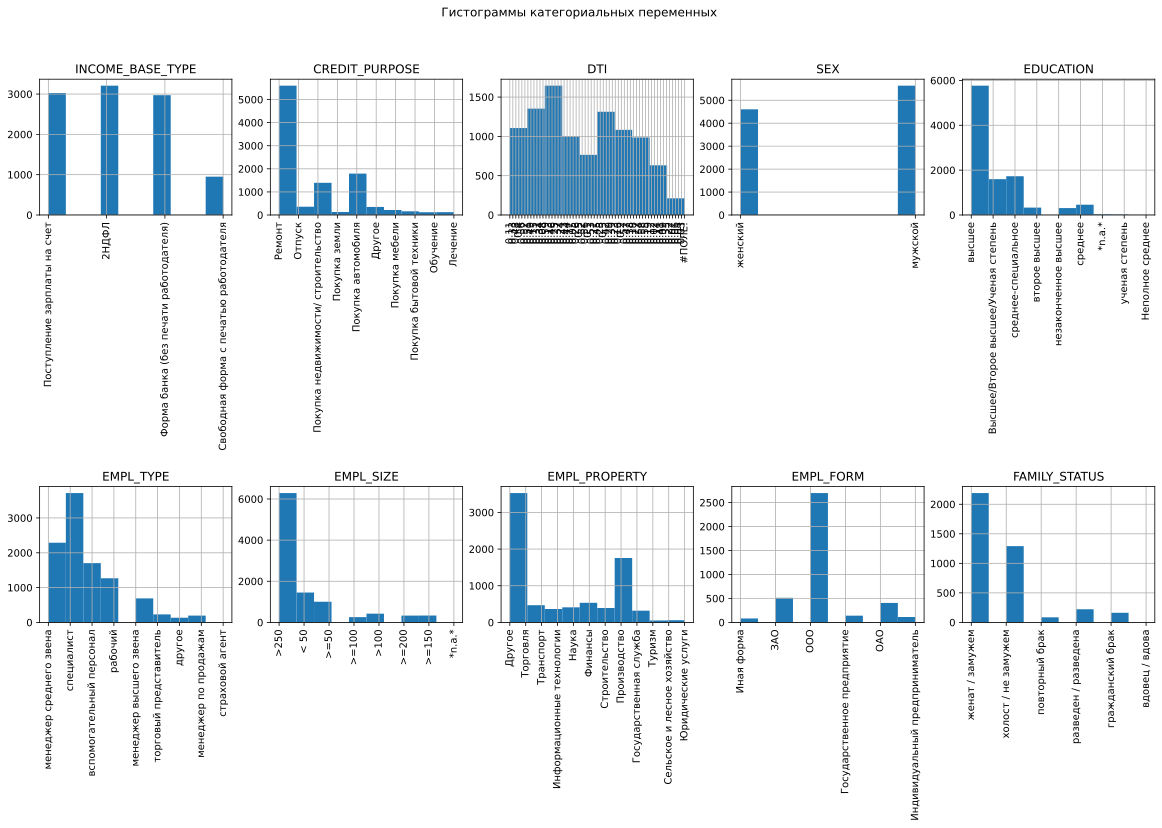

In [153]:
# строим гистограммы
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=2)
plt.suptitle("Гистограммы категориальных переменных")
for ax, col in zip(axs.flatten(), cols_cat):
  plt.sca(ax)
  plt.xticks(rotation=90)
  ax.set_title(col)
  data[col].hist(ax=ax)

plt.show()

Как можно видеть на гистограмме DTI, у нас переменная `"debt-to-income ratio — отношение долга к доходам"` неправильно определилась как категориальная, потому что в ней есть одно лишнее значение `#ПОЛЕ!`, еоторое надо будет потом заменить на `nan`. Также в некторых других паказателях тоже есть лишние значения `*n.a.*`, которые тоже надо будет заменить.

In [154]:
# удаляем 'DTI' из категориальных колонок
cols_cat.remove('DTI')

#### Пункт 1.4: (бонус) Исследуем распределение данных по числовым показателям

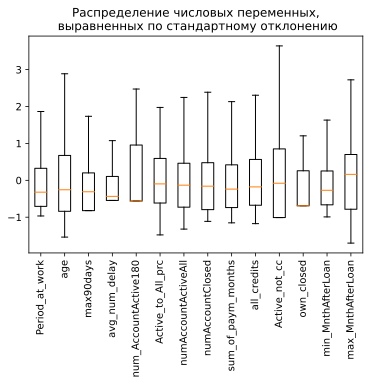

In [155]:
# строим диаграммы Ящикова с Усачёвым 🙃
# cols_num = [col for col in data if data[col].dtype == float and data[col].unique().size > 3]
cols_num = [
  'Period_at_work',
  'age',
  'max90days',
  'avg_num_delay',
  'num_AccountActive180',
  'Active_to_All_prc',
  'numAccountActiveAll',
  'numAccountClosed',
  'sum_of_paym_months',
  'all_credits',
  'Active_not_cc',
  'own_closed',
  'min_MnthAfterLoan',
  'max_MnthAfterLoan'
]

def scale_col(arr):
  arr = arr[~np.isnan(arr)]
  # code from StandardScaler
  return (arr - np.mean(arr)) / np.std(arr)

plt.title("Распределение числовых переменных,\n выравненных по стандартному отклонению")
plt.xticks(rotation=90)
plt.boxplot([scale_col(data[col]) for col in cols_num], labels=cols_num, sym='')
plt.show()

### Задание 2: Делаем проверки

#### Пункт 2.1: Проверка на полноту данных по клиентам

In [156]:
# ищем те самые 20 колонок
stats = dict(res1['кол-во пустых'].value_counts())
amount = max(stats, key=stats.get)
cols_sparse = list(res1[res1['кол-во пустых'] == amount]['колонка'])
print("amount =", amount)
print("cols_sparse len =", len(cols_sparse))

amount = 6627
cols_sparse len = 20


Если смотреть на таблицу 1, то можно заметить что у двадцати последних колонок всегда одинаковое количество пропущенных значений -- 6627. Можно предположить что они всегда пропущенны вместе у одних и техже клиентов. Чтобы проверить эту гипотезу, мы можем взять только клиентов, у которых пропущенная первая из этих колонок, и посмотреть пропущены ли у них остальные.

In [157]:
# проверяем гипотезу
(~data[data[cols_sparse[0]].isna()][cols_sparse].isna()).sum()

if_zalog                0
num_AccountActive180    0
num_AccountActive90     0
num_AccountActive60     0
Active_to_All_prc       0
numAccountActiveAll     0
numAccountClosed        0
sum_of_paym_months      0
all_credits             0
Active_not_cc           0
own_closed              0
min_MnthAfterLoan       0
max_MnthAfterLoan       0
dlq_exist               0
thirty_in_a_year        0
sixty_in_a_year         0
ninety_in_a_year        0
thirty_vintage          0
sixty_vintage           0
ninety_vintage          0
dtype: int64

Все значения пропущены. Гипотеза подтвердилась. В дальнейшем мы сможем выкинуть этих клиентов.

#### Пункт 2.2: Проверка на пропущенные и нулевые значения в полях

In [158]:
# удаляем нехороших клиентов
data_tmp = data[~data[cols_sparse[0]].isna()]
# смотрим какие остались nan-ы
nan_sum = data_tmp.isna().sum()
nan_sum[nan_sum != 0]

max90days         4
max60days         4
max30days         4
max21days         4
max14days         4
avg_num_delay    15
dtype: int64

После удаления клиентов с большим числом пропусков, пропущенных значений осталось только 35 в шести разных колонках. Это достаточно маленькое количество, чтобы потом их можно было заполнить среднеми/медианными значениями.

#### Пункт 2.3: Проверка на наличие некорректных знаков

In [159]:
# список всех уникальных значений категориальных переменных
np.unique([x for col in cols_cat for x in data[col].unique()])

array(['*n.a.*', '2НДФЛ', '< 50', '>100', '>250', '>=100', '>=150',
       '>=200', '>=50', 'nan', 'Высшее/Второе высшее/Ученая степень',
       'Государственная служба', 'Государственное предприятие', 'Другое',
       'ЗАО', 'Иная форма', 'Индивидуальный предприниматель',
       'Информационные технологии', 'Лечение', 'Наука',
       'Неполное среднее', 'ОАО', 'ООО', 'Обучение', 'Отпуск',
       'Покупка автомобиля', 'Покупка бытовой техники', 'Покупка земли',
       'Покупка мебели', 'Покупка недвижимости/ строительство',
       'Поступление зарплаты на счет', 'Производство', 'Ремонт',
       'Свободная форма с печатью работодателя',
       'Сельское и лесное хозяйство', 'Строительство', 'Торговля',
       'Транспорт', 'Туризм', 'Финансы',
       'Форма банка (без печати работодателя)', 'Юридические услуги',
       'вдовец / вдова', 'вспомогательный персонал', 'второе высшее',
       'высшее', 'гражданский брак', 'другое', 'женат / замужем',
       'женский', 'менеджер высшего звена'

В этом списке нет никаких подозрительных значений, кроме `"*n.a.*"`, `"nan"` и `"#ПОЛЕ!"` которые мы уже заметели в пункте 1.3.

### Задание 3: Готовим итоговую витрину данных для сегментации

#### Пункт 3.1: Корректируем данные – исправляем ошибки

In [160]:
# заменяем неправильные значения на nan-ы
data = data.replace('#ПОЛЕ!', np.nan).replace('*n.a.*', np.nan).replace('nan', np.nan).replace('< 50', '<50')

In [161]:
# удаляем первые две колонки
data = data.drop(columns=["Номер варианта", "ID"])

#### Пункт 3.2: Исключаем клиентов с большим числом пропусков и восстанавливаем пропущенные значения

In [162]:
# исключаем клиентов
data = data[~data[cols_sparse[0]].isna()]

In [163]:
# заполняем nan-ы соседними значениями
data = data.fillna(method="ffill")

#### Пункт 3.3: Переводим категориальные показатели в целочисленные

In [164]:
# применяем OneHotEncoder только к категориальным колонкам
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
  ('cat', OneHotEncoder(), cols_cat),
], remainder="passthrough")

X = column_transformer.fit_transform(data.astype({'DTI': float}))

In [165]:
# проверяем что он работает на примере колонок "SEX" и "INCOME_BASE_TYPE"
OneHotEncoder().fit_transform(data[["SEX", "INCOME_BASE_TYPE"]]).todense()

matrix([[1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0., 1.],
        [0., 1., 1., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0.]])

## Часть 2: Сегментация

### Метод 1: K-means

#### Обоснование

Я выбрал метод кластеризации без учителя, то есть метод K-средних, так как он требует меньше всего понимания структуры датасета.
Для кластеризации с учителем надо выбрать целевую переменную, а RFM и бизнес-правила вообще полностью пишутся человеком.
Чтобы воспользоваться этими методами нужно понимать датасет, который у нас довольно большой -- 43 колонки.
Поэтому использовать K-средних имеет смысл первым, а потом, после анализа его результатов, может быть мы будем лучше понимать датасет.
Также я выбрал количество кластеров 3, так как два кластера получаются слишком широкие, а четыре уже сложно анализировать.

In [166]:
# обучаем кластеризатор
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

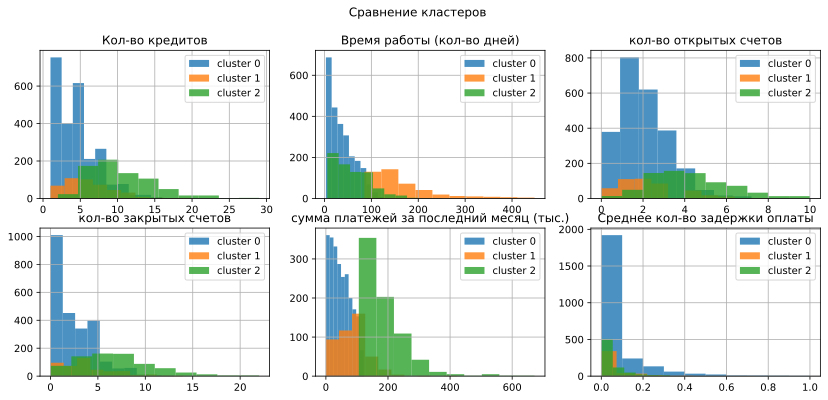

In [167]:
# строим гистограммы
def trunc(x):
  return (x[:40] + '...') if len(x) > 40 else x

def cluster_hist(cols1, axs, labels):
  vals = np.unique(labels)
  for col, ax in zip(cols1, axs.flatten()):
    plt.sca(ax)
    plt.title(trunc(cols[cols['Атрибуты'] == col]['Описание'].iloc[0]))
    for i, val in enumerate(vals):
      data[labels == val][col].hist(label=f'cluster {i}', alpha=0.8)
    plt.legend()

fig, axs = plt.subplots(2, 3, figsize=(14, 6))
cluster_hist([
  'all_credits', 'Period_at_work', 'numAccountActiveAll',
  'numAccountClosed', 'sum_of_paym_months', 'avg_num_delay'
], axs, kmeans.labels_)

plt.suptitle("Сравнение кластеров")
plt.show()

#### Анализ результатов

На рисунке приведены гистограммы для тех параметров клиентов, на которых, по крайней мере визуально, видны различия между кластерами.
Чтобы было проще к ним обращаться, назовём кластеры <<раздолбаи>>, <<работяги>> и <<богачи>>.
У раздолбаев мало счетов (закрытых и открытых), они берут мало кредитов, мало работают, мало платят и относительно много задерживают платежи.
Работяги много работают, но платят мало платежей, а богачи наоборот: мало работают и много платят.

In [168]:
# сравниваем все полученные кластеры
from scipy.stats import f_oneway
f_oneway(X[kmeans.labels_ == 0], X[kmeans.labels_ == 1], X[kmeans.labels_ == 2]).pvalue

array([1.00204018e-006, 2.83109014e-023, 3.96011399e-005, 1.09149864e-039,
       5.62453920e-001, 4.75550709e-001, 9.75022290e-001, 4.66385518e-001,
       1.74243642e-006, 2.09439629e-002, 6.11995708e-001, 7.23196865e-001,
       3.21858119e-001, 1.43330110e-004, 9.69873877e-001, 9.69873877e-001,
       4.14227178e-013, 7.85946670e-001, 4.68892945e-002, 4.69217132e-005,
       4.94827973e-003, 3.43454991e-002, 4.94747511e-007, 5.89413227e-004,
       1.34351379e-007, 5.03812600e-001, 1.21499154e-008, 2.16583030e-001,
       1.64084092e-006, 2.40358538e-009, 1.02214133e-002, 5.45856926e-001,
       2.19976098e-002, 4.37296563e-004, 4.37296563e-004, 7.65839146e-016,
       5.69635066e-001, 1.00018983e-001, 5.64707943e-012, 6.30422218e-001,
       9.30557515e-010, 2.06478358e-001, 1.29495806e-002, 5.60798371e-001,
       1.47438992e-017, 2.23497118e-025, 2.80538843e-002, 1.71218853e-001,
       3.65158466e-004, 3.10970352e-001, 8.35533690e-001, 3.90379248e-004,
       7.63439563e-002, 1

In [169]:
# сравниваем кластер 0 с самим собой

def split(x):
  np.random.shuffle(x)
  l = x.shape[0]//2
  return x[:l], x[l:]

f_oneway(*split(X[kmeans.labels_ == 0])).pvalue

c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:3659: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


array([0.8505803 , 0.77357824, 0.02142708, 0.02850744, 0.52815071,
       0.85663037, 0.20592161, 0.19758446, 0.87635804, 0.41748915,
       0.14177086, 0.77931474, 0.57188114, 0.8710421 , 0.31157118,
       0.31157118, 0.50308068, 0.31740975, 0.90000393, 0.43706224,
       0.22929878, 0.50737077, 0.46575913, 0.31740975, 1.        ,
       0.56364952, 0.69945437, 0.47895598, 0.95974855, 0.82036221,
       0.93364781, 0.31740975, 0.90668037, 0.92371268, 0.92371268,
       0.35829071, 0.1609799 , 0.46549984, 0.86972875, 0.23697562,
       0.5298033 , 0.22677554, 0.18511359, 0.90418061, 0.82525941,
       0.53075526,        nan, 0.76688813, 0.68499964, 0.41748915,
       0.11228969, 0.96600215, 0.61889658, 0.70454759, 0.48826196,
       0.34578407, 0.73706382, 0.06549571, 0.39790731, 0.69360643,
       0.61433206, 0.59290692, 0.57646091, 0.66386657, 0.14252513,
       0.01054514, 0.53718468, 0.39700846, 0.80699414, 0.9484228 ,
       0.37369386, 0.60685009, 0.24608719, 0.97607436, 0.63939

In [170]:
# сравниваем кластер 1 с самим собой
f_oneway(*split(X[kmeans.labels_ == 1])).pvalue

array([0.75948066, 0.74147808, 0.80519628, 0.9231427 , 0.12713899,
       0.47661516, 0.10058806, 0.39952868, 0.89481882, 0.73699448,
       0.41217913, 0.76076798, 0.26777755, 0.18167818, 0.84980324,
       0.84980324, 0.63189494,        nan, 0.76076798, 1.        ,
       0.41217913, 0.50350445, 0.2634845 ,        nan, 0.67573797,
       0.31785764, 0.45000664, 0.7039924 , 0.51796997, 0.59909069,
       0.41500736,        nan, 0.31621158, 0.42922775, 0.42922775,
       0.25552746, 0.21855395,        nan, 0.56151107, 0.65376611,
       0.61592349, 0.06529497, 0.33689947, 0.80519628, 0.64804191,
       0.12816791, 0.31785764, 0.03262172, 0.62674653, 0.58801609,
       0.4199479 , 0.33599908, 1.        , 0.38765353, 0.71525744,
       0.31785764, 0.76288998, 0.82441922, 0.11600891, 0.86277785,
       0.25037379, 0.02291446, 0.01013087, 0.00901508, 0.60229197,
       0.55521955, 0.16351631, 0.89852181, 0.27622085, 0.19675231,
       0.36236602, 0.44654698, 0.09996822, 0.84641586, 0.96540

### Метод 2: Decision Tree

#### Обоснование

В качестве второго метода сегментации я испытал много разных альтернатив и в конце концов пришёл к выбору дерева решений.
Этот метод имеет ряд преимуществ. Он строит дерево, которое в дальнейшем можно нарисовать, что помогает в процессе интерпретации результатов. Также можно ограничить высоту этого дерева, что приводит к сниженному качеству дерева как классификатора.
Но смысл в том что нам на самом деле не нужен идеальный классификатор.
Если бы мы хотели разделить на сегменты по целевой переменной, мы бы могли просто взять её.
В ходе выполнения этого задания, я понял что неидеальный классификатор выдаёт сегменты, которые анализировать проще.

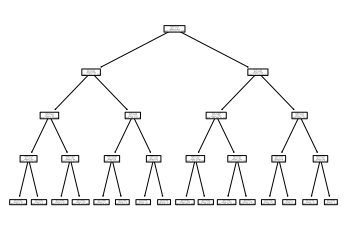

In [171]:
# тренируем классификатор
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder

clf = DecisionTreeClassifier(random_state=0, max_depth=4)
X1 = np.delete(X, range(0, 5), axis=1)
y1 =  OrdinalEncoder().fit_transform(data[['INCOME_BASE_TYPE']])
clf.fit(X1, y1)
plot_tree(clf)
pass

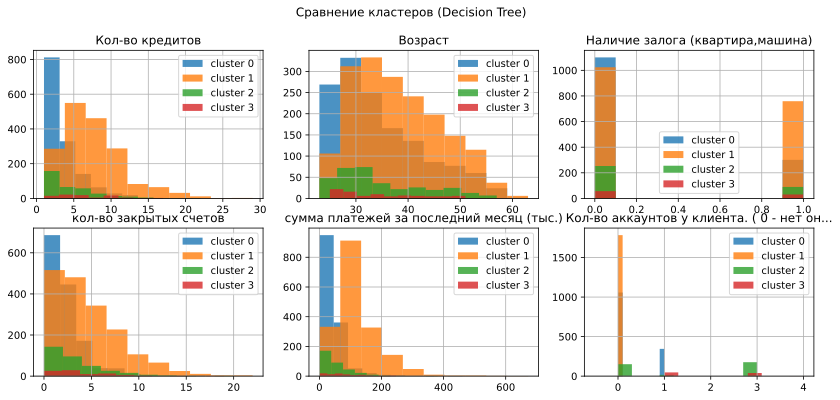

In [172]:
# строим графики
labels = clf.predict(X1)
labels[labels == 0] = 4
labels[labels == 2] = 5
fig, axs = plt.subplots(2, 3, figsize=(14, 6))
cluster_hist([
  'all_credits', 'age', 'if_zalog',
  'numAccountClosed', 'sum_of_paym_months', 'BANKACCOUNT_FLAG'
], axs, labels)

plt.suptitle("Сравнение кластеров (Decision Tree)")
plt.show()

#### Анализ результатов

У нас получились два больших сегмента (ноль и один на рисунке синий и оранжевый), и два маленьких.
Если сравнивать большие сегменты, то можно заметить что оранжевые клиенты в среднем старше синих,
берут больше кредитов, закрывают больше счетов и ставят больше залогов.
Два маленьких кластера от больших отличаются тем, что у них сильно больше аккаунтов в онлайн банке.
И вероятно сегмент 2 соответствует сегменту 0, и сегмент 3 соответствует сегменту 1, но они настолько маленькие, что это сложно понять.

In [175]:
# сравниваем между собой два больших сегмента
f_oneway(X[labels == 1], X[labels == 3]).pvalue

array([4.83876217e-002, 2.02554160e-103, 5.21349491e-002, 6.93146000e-116,
       9.53488876e-001, 6.98020640e-001, 3.34666340e-001, 1.11096572e-001,
       2.15059588e-005, 1.36230459e-001, 6.30212492e-001, 9.80448299e-001,
       9.07822798e-001, 1.17344491e-004, 2.02184003e-001, 2.02184003e-001,
       1.15679001e-023,             nan, 5.93909568e-001, 8.41447691e-006,
       7.56436983e-001, 7.42043594e-003, 6.68815316e-004, 1.76821980e-001,
       4.50093353e-009, 1.24466927e-001, 4.18035492e-034, 6.22205867e-001,
       1.89721886e-007, 2.18043151e-005, 4.83512761e-005, 2.09804915e-001,
       1.40544136e-002, 5.20658651e-170, 5.20658651e-170, 5.66133106e-001,
       3.29789380e-004, 3.02460848e-001, 3.18144552e-001, 5.14352133e-002,
       6.55755826e-001, 2.01939116e-001, 9.87752421e-002, 1.40000115e-011,
       4.21800687e-002, 6.54542014e-001, 2.59502433e-001, 3.68421625e-001,
       5.47872144e-003, 6.35539064e-001, 9.99348699e-001, 6.91067485e-003,
       1.87160090e-002, 1

In [174]:
# сравниваем сегмент 1 с самим собой
f_oneway(*split(X[labels == 1])).pvalue

array([8.43918059e-01, 4.80381028e-01, 2.42760588e-01, 9.37158562e-01,
       6.62917548e-01, 3.16511520e-02, 4.36472650e-01, 2.83656602e-01,
       1.75801154e-01, 2.31109630e-01, 2.82963605e-01, 1.00000000e+00,
       6.86454493e-01, 5.93238353e-01, 3.10503699e-01, 3.10503699e-01,
       5.64170269e-01,            nan, 6.42446759e-01, 6.65302790e-01,
       1.90866138e-01, 7.25311200e-01, 8.34602087e-01, 3.17483313e-01,
       1.96236077e-01,            nan, 6.07874882e-01, 4.28404323e-01,
       1.28482370e-01, 6.59321726e-01, 4.15483683e-01,            nan,
       1.00000000e+00, 5.91433475e-01, 5.91433475e-01, 6.93399955e-01,
       8.00691836e-01, 6.54420531e-01, 5.92573783e-01, 7.38291423e-01,
       3.78546170e-01, 6.41426410e-01, 2.35227177e-01, 5.82142141e-02,
       3.07396318e-02, 3.87459416e-01, 3.17483313e-01, 1.43617913e-01,
       1.33917031e-01, 8.56003727e-01, 1.36927523e-01, 1.43161625e-01,
       6.21530129e-01, 1.11663964e-04, 2.27412792e-01,            nan,
      